In [1]:
#load mnist dataset
from keras.datasets import mnist
import sys
import numpy as np
(trainX,trainy),(testX,testy)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
#loaded dataset summary
print(trainX.shape, trainy.shape)
print(testX.shape,testy.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#one hot encoding the labels 
one_hot=np.zeros((len(trainy),10))
for a,b in enumerate(trainy):
  one_hot[a][b]=1
trainy=one_hot
test_labels=np.zeros((len(testy),10))
for a,b in enumerate(testy):
  test_labels[a][b]=1

In [4]:
#reshaping the numpy array as image generator iterator needs numpy array of rank 4 
trainx=trainX.reshape(trainX.shape[0],trainX.shape[1],trainX.shape[2],1)
#trainx=trainX.reshape(-1,28,28,1)
print("train data before and after reshaping:",trainX.shape,trainx.shape)
testx=testX.reshape(testX.shape[0],testX.shape[1],testX.shape[2],1)
print("test data before and after reshaping:",testX.shape,testx.shape)

train data before and after reshaping: (60000, 28, 28) (60000, 28, 28, 1)
test data before and after reshaping: (10000, 28, 28) (10000, 28, 28, 1)


In [5]:
#define sigmoid function and its derivative
def sigmoid(x):
  return 1/(np.exp(-x)+1)

def sigmoid_gradient(x):
  t=sigmoid(x)
  return t*(1-t)


In [6]:
#define relu activation function and its derivative
def relu(x):
  return np.maximum(x,0)

def relu_gradient(x):
  return (x>0).astype(int)

In [7]:
#define softmax function and its derivative function
def softmax(x):
  e=np.exp(x-x.max())
  return e/np.sum(e,axis=0)

def softmax_gradient(x):
  e=np.exp(x-x.max())
  return e/np.sum(e,axis=0) * ((1-e)/np.sum(e,axis=0))



In [8]:
#initialising weights for 3 layers
w1=0.2*np.random.randn(784,128)*np.sqrt(1/128)
w2=0.2*np.random.randn(128,64)*np.sqrt(1/64)
w3=0.2*np.random.randn(64,10)*np.sqrt(1/10)


In [9]:
#Initialising image data generator to normalise the input data and apply augmentation techniques
from keras.preprocessing.image import ImageDataGenerator
generator=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,zoom_range=0.12,width_shift_range=0.12,height_shift_range=0.12, rescale=1/255)
generator.fit(trainx)
#generator.fit(testx)
#train=generator.flow(trainx,trainy,batch_size=128)
#test=generator.flow(testx,testy,batch_size=128)




In [10]:
#considering just 100 iterations as colab is crashing if more number are consideredfor iterations in range(100):
  error=0
  count=0
  bias=0.001
  batches=0
  for x,y in generator.flow(trainx,trainy,batch_size=128):
    if batches>10:
      break
    batches=batches+1
    x.shape=(128,784)
    z1=x.dot(w1)
    #initilaising dropout layer to reduce the number of nodes
    dropout_layer=np.random.randint(2,size=z1.shape)
    a1=relu(z1)
    d1=a1* dropout_layer * 2
    z2=d1.dot(w2)
    a2=relu(z2)
    z3=a2.dot(w3)
    error += np.sum((y - z3) ** 2)
    for k in range(128):
      count+=int(np.argmax(z3[k:k+1]))==np.argmax(y[k:k+1])
      z3_gradient=(y-z3)/128
      z2_gradient=z3_gradient.dot(w3.T)*relu_gradient(a2)
      z1_gradient=z2_gradient.dot(w2.T)*relu_gradient(a1)
      z1_gradient*=dropout_layer
      #update weights
      w1+=bias* x.T.dot(z1_gradient)
      w2+=bias* a1.T.dot(z2_gradient)
      w3+=bias* a2.T.dot(z3_gradient)
  if(iterations%10==0):
    test_err=0.0
    test_crct=0

    y_pred=[]
    y_true=[]
    test_img=testx.reshape(len(testx),28*28)/255
    for i in range(len(test_img)):
      l1=relu(np.dot(test_img[i:i+1],w1))
      l2=np.dot(l1,w2)
      l3=np.dot(l2,w3)

      y_pred.append((np.argmax(l3))) 
      y_true.append(int(np.argmax(test_labels[i:i+1])))
      test_err+=np.sum((test_labels[i:i+1] - l3)**2)
      test_crct+=int(np.argmax(l3))==np.argmax(test_labels[i:i+1])
    sys.stdout.write("\n"+ "Iteration:" + str(iterations) + " Test-Error: " + str(test_err/ float(len(test_img)))[0:5]+" Test-Accuracy: "+str(test_crct/ float(len(test_img)))+" Train-Error: "+str(error/ float(1000))[0:5] +"Train-Accuracy:"+str(count/ float(len(x))))






Iteration:0 Test-Error: 0.927 Test-Accuracy: 0.1579 Train-Error: 1.327Train-Accuracy:1.59375
Iteration:10 Test-Error: 0.840 Test-Accuracy: 0.5078 Train-Error: 1.033Train-Accuracy:4.9140625
Iteration:20 Test-Error: 0.800 Test-Accuracy: 0.565 Train-Error: 0.926Train-Accuracy:6.09375
Iteration:30 Test-Error: 0.780 Test-Accuracy: 0.5512 Train-Error: 0.856Train-Accuracy:6.40625
Iteration:40 Test-Error: 0.761 Test-Accuracy: 0.5337 Train-Error: 0.769Train-Accuracy:7.28125
Iteration:50 Test-Error: 0.740 Test-Accuracy: 0.6907 Train-Error: 0.759Train-Accuracy:7.2265625
Iteration:60 Test-Error: 0.738 Test-Accuracy: 0.6306 Train-Error: 0.722Train-Accuracy:7.5546875
Iteration:70 Test-Error: 0.736 Test-Accuracy: 0.6982 Train-Error: 0.720Train-Accuracy:7.6796875
Iteration:80 Test-Error: 0.723 Test-Accuracy: 0.7387 Train-Error: 0.656Train-Accuracy:8.171875
Iteration:90 Test-Error: 0.711 Test-Accuracy: 0.7596 Train-Error: 0.655Train-Accuracy:8.1875

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def Confusion_matrix(cm,classes,normalize=False,title='confusion matrix of mnist',cmap=plt.cm.Greens):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  threshold=cm.max() / 3.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>threshold else 'black')
  
  plt.tight_layout()
  plt.ylabel('True')
  plt.xlabel('Predicted')

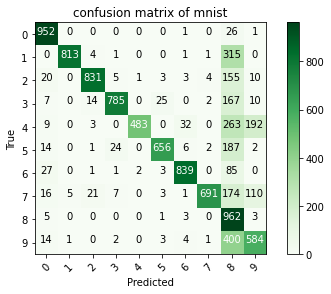

In [32]:
confusion_matrix=confusion_matrix(y_true,y_pred)
Confusion_matrix(confusion_matrix,classes=range(10))